In [16]:
# Fix figure.dpi
%matplotlib inline
# Display exactly the figure that will be saved
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

from pathlib import Path

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [17]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.dpi']

100.0

### Exercise 1

Figure size: 5.12 x 5.12 inches


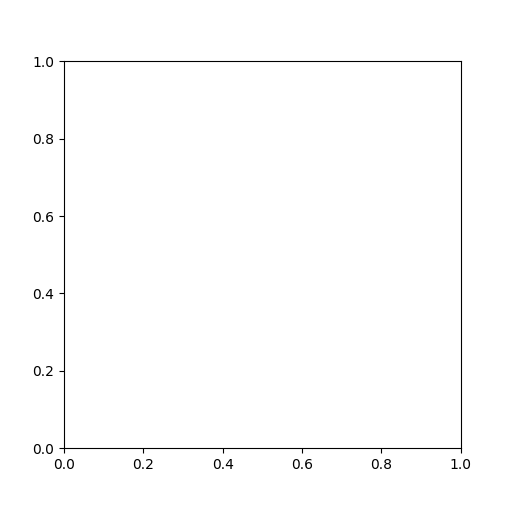

../../figures/01-anatomy/exercise_1_plot.png PNG 512x512 512x512+0+0 8-bit sRGB 6287B 0.000u 0:00.000


In [18]:
pixels_width = 512
pixels_height = 512

dpi = 100
fig_width = pixels_width / dpi
fig_height = pixels_height / dpi
print(f'Figure size: {fig_width} x {fig_height} inches')

fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=dpi)
file_path = Path('../../figures/01-anatomy/exercise_1_plot.png')
plt.savefig(file_path, dpi=dpi)
plt.show()

!identify {file_path}